# <font style="color:purple">Download the Dataset</font> 

**[Download the Vehicle registration plate](https://www.dropbox.com/s/k81ljpmzy3fgtx9/Dataset.zip?dl=1)**


Download the Vehicle Registration Plate dataset from [here](https://www.dropbox.com/s/k81ljpmzy3fgtx9/Dataset.zip?dl=1) and unzip it. 

We will have the following directory structure:

```
Dataset
├── train
│   └── Vehicle registration plate
│       └── Label
└── validation
    └── Vehicle registration plate
        └── Label
```

Unzipping the file will give you a directory `Dataset`. This directory has two folder `train` and `validation`. Each train and validation folder has `Vehicle registration plate`  folder with `.jpg` images and a folder `Labels`.  `Labels` folder has bounding box data for the images.


For example,
For image: `Dataset/train/Vehicle registration plate/bf4689922cdfd532.jpg`
Label file is  `Dataset/train/Vehicle registration plate/Label/bf4689922cdfd532.txt`

There are one or more lines in each `.txt` file. Each line represents one bounding box.
For example,
```
Vehicle registration plate 385.28 445.15 618.24 514.225
Vehicle registration plate 839.68 266.066462 874.24 289.091462
```

We have a single class detection (`Vehicle registration plate detection`) problem. So bounding box details start from the fourth column in each row.

Representation is in `xmin`, `ymin`, `xmax`, and `ymax` format.

**It has `5308` training and `386` validation dataset.**

Data is downloaded from [Open Images Dataset](https://storage.googleapis.com/openimages/web/index.html)

# <font style="color:blue">Project 3: Object Detection</font>


#### Maximum Points: 100

<div>
    <table>
        <tr><td><h3>Sr. no.</h3></td> <td><h3>Section</h3></td> <td><h3>Points</h3></td> </tr>
        <tr><td><h3>1</h3></td> <td><h3>Plot Ground Truth Bounding Boxes</h3></td> <td><h3>20</h3></td> </tr>
        <tr><td><h3>2</h3></td> <td><h3>Training</h3></td> <td><h3>25</h3></td> </tr>
        <tr><td><h3>3</h3></td> <td><h3>Inference</h3></td> <td><h3>15</h3></td> </tr>
        <tr><td><h3>4</h3></td> <td><h3>COCO Detection Evaluation</h3></td> <td><h3>25</h3></td> </tr>
        <tr><td><h3>5</h3></td> <td><h3>Run Inference on a Video</h3></td> <td><h3>15</h3></td> </tr>
    </table>
</div>


#  <font style="color:green">1. Plot Ground Truth Bounding Boxes [20 Points]</font> 

**You have to show three images from validation data with the bounding boxes.**

The plotted images should be similar to the following:

<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w10-g1.png'>



<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w10-g2.png'>



<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w10-g3.png'>



In [11]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!pip install ultralytics==8.2.80 -q
!pip install opencv-python==4.10.0.84 -q
!pip install matplotlib -q
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.80 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5846.0/8062.4 GB disk)


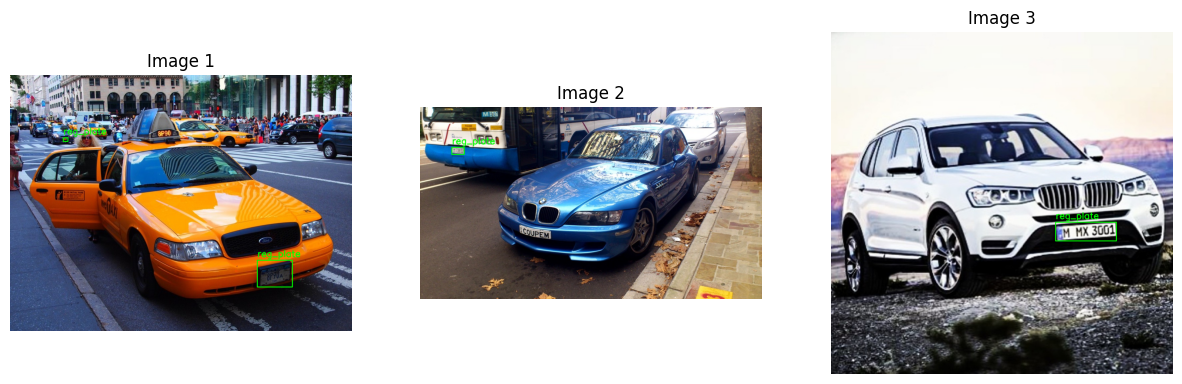

In [12]:
import os
import glob
import cv2
import matplotlib.pyplot as plt

# Function to read and process each label file
def read_label_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        boxes = []
        for line in lines:
            parts = line.strip().split()
            x_min = float(parts[3])
            y_min = float(parts[4])
            x_max = float(parts[5])
            y_max = float(parts[6])
            boxes.append((x_min, y_min, x_max, y_max))
    return boxes

# Function to draw bounding boxes on an image
def draw_bounding_boxes(image_path, boxes):
    image = cv2.imread(image_path)
    label='reg_plate'
    for (x_min, y_min, x_max, y_max) in boxes:
        cv2.rectangle(image, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0, 255, 0), 2)
        cv2.putText(image, label, (int(x_min), int(y_min) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    return image

# Paths to the validation directories
validation_dir = '/kaggle/input/object-dectection-num-plate/Dataset/validation/Vehicle registration plate'
label_dir = os.path.join(validation_dir, 'Label')

# Get a list of all image files and their corresponding label files
image_files = glob.glob(os.path.join(validation_dir, '*.jpg'))
label_files = [os.path.join(label_dir, os.path.basename(f).replace('.jpg', '.txt')) for f in image_files]

# Display three images with bounding boxes
plt.figure(figsize=(15, 10))
for i in range(3):
    image_path = image_files[i]
    label_path = label_files[i]
    boxes = read_label_file(label_path)
    image_with_boxes = draw_bounding_boxes(image_path, boxes)
    
    plt.subplot(1, 3, i+1)
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.title(f'Image {i+1}')
    plt.axis('off')

plt.show()


In [13]:
import os
import glob as glob
import matplotlib.pyplot as plt
import cv2
import requests
import random
import numpy as np

np.random.seed(42)

In [14]:
# Function to convert bounding boxes in YOLO format to xmin, ymin, xmax, ymax.
def yolo2bbox(bboxes):
    xmin, ymin = bboxes[0]-bboxes[2]/2, bboxes[1]-bboxes[3]/2
    xmax, ymax = bboxes[0]+bboxes[2]/2, bboxes[1]+bboxes[3]/2
    return xmin, ymin, xmax, ymax

In [15]:
class_names = ['plate']

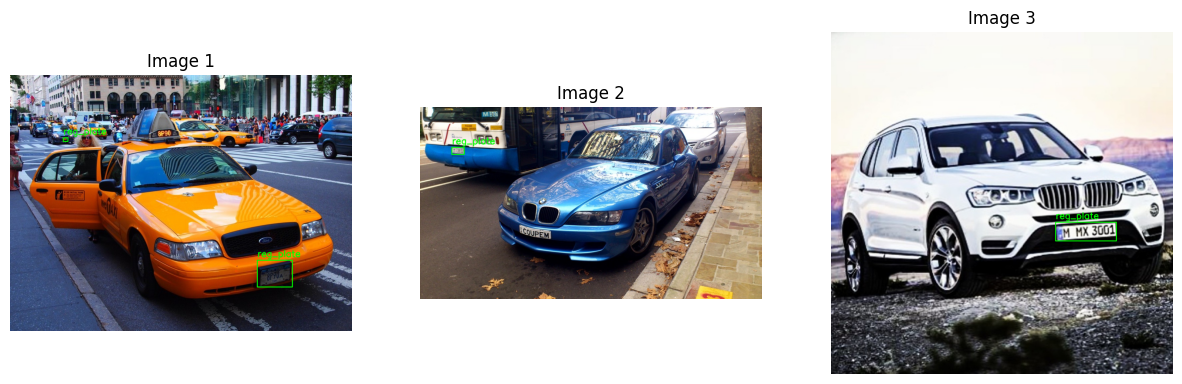

In [4]:
import os
import glob
import cv2
import matplotlib.pyplot as plt

# Function to read and process each label file
def read_label_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        boxes = []
        for line in lines:
            parts = line.strip().split()
            x_min = float(parts[3])
            y_min = float(parts[4])
            x_max = float(parts[5])
            y_max = float(parts[6])
            boxes.append((x_min, y_min, x_max, y_max))
    return boxes

# Function to draw bounding boxes on an image
def draw_bounding_boxes(image_path, boxes):
    image = cv2.imread(image_path)
    label='reg_plate'
    for (x_min, y_min, x_max, y_max) in boxes:
        cv2.rectangle(image, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0, 255, 0), 2)
        cv2.putText(image, label, (int(x_min), int(y_min) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    return image

# Paths to the validation directories
validation_dir = '/kaggle/input/object-dectection-num-plate/Dataset/validation/Vehicle registration plate'
label_dir = os.path.join(validation_dir, 'Label')

# Get a list of all image files and their corresponding label files
image_files = glob.glob(os.path.join(validation_dir, '*.jpg'))
label_files = [os.path.join(label_dir, os.path.basename(f).replace('.jpg', '.txt')) for f in image_files]

# Display three images with bounding boxes
plt.figure(figsize=(15, 10))
for i in range(3):
    image_path = image_files[i]
    label_path = label_files[i]
    boxes = read_label_file(label_path)
    image_with_boxes = draw_bounding_boxes(image_path, boxes)
    
    plt.subplot(1, 3, i+1)
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.title(f'Image {i+1}')
    plt.axis('off')

plt.show()

#  <font style="color:green">2. Training [25 Points]</font> 

- **Write your training code in this section.**

- **You also have to share ([shared logs example](https://tensorboard.dev/experiment/JRtnsKbwTaq1ow6nPLPGeg)) the loss plot of your training using tensorboard.dev.** 

How to share TensorBoard logs using tensorboard.dev find [here](https://courses.opencv.org/courses/course-v1:OpenCV+OpenCV-106+2019_T1/courseware/b1c43ffe765246658e537109e188addb/d62572ec8bd344db9aeae81235ede618/4?activate_block_id=block-v1%3AOpenCV%2BOpenCV-106%2B2019_T1%2Btype%40vertical%2Bblock%40398b46ddcd5c465fa52cb4d572ba3229).

In [16]:
if not os.path.exists('yolov5'):
    !git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 16927, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 16927 (delta 62), reused 87 (delta 48), pack-reused 16805 (from 1)
Receiving objects: 100% (16927/16927), 15.68 MiB | 25.09 MiB/s, done.
Resolving deltas: 100% (11591/11591), done.


In [17]:
%cd yolov5/
!pwd

/kaggle/working/yolov5/yolov5
/kaggle/working/yolov5/yolov5


In [18]:
!pip install -r requirements.txt

In [19]:
%%writefile data.yaml
train: '/kaggle/input/object-dectection-num-plate/Dataset/train'
val: '/kaggle/input/object-dectection-num-plate/Dataset/validation'
nc: 1
names: ['plate']


Writing data.yaml


In [23]:
!python train.py --data data.yaml --weights yolov5m.pt --img 1024 --epochs {5} --batch-size 32

train: weights=yolov5m.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=32, imgsz=1024, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-362-ge8a30cf8 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj

#  <font style="color:green">3. Inference [15 Points]</font> 

**You have to make predictions from your trained model on three images from the validation dataset.**

The plotted images should be similar to the following:

<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w10-p1.png'>



<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w10-p2.png'>



<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w10-p3.png'>




In [ ]:
!python val.py --task 'test' --weights runs/train/exp/weights/best.pt --data ../data.yaml

In [ ]:
# Run inference.
!python detect.py --source ../inference --weights runs/train/exp/weights/best.pt --project inference_results --name .
plt.figure(figsize=(25,15))
for i in range(3):
  img = cv2.imread('./inference_results/drone-test{}.jpg'.format(i+1))
  plt.subplot(1, 3, i+1);
  plt.imshow(img[...,::-1]);

#  <font style="color:green">4. COCO Detection Evaluation [25 Points]</font> 

**You have to evaluate your detection model on COCO detection evaluation metric.**

For your reference here is the coco evaluation metric chart:


---

<img src="https://www.learnopencv.com/wp-content/uploads/2020/03/c3-w9-coco_metric.png">

---

#### <font style="color:red">The expected `AP` (primary challenge metric) is more than `0.5`.</font>

**The expected output should look similar to the following:**

```
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.550
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.886
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.629
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.256
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.653
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.627
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.504
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.629
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.633
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.380
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.722
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.704
```



# <font style="color:green">5. Run Inference on a Video [15 Points]</font>

#### [Download the Input Video](https://www.dropbox.com/s/g88o4dx18zpgn8k/projet3-input-video.mp4?dl=1)

**You have to run inference on a video.** 

You can download the video from [here](https://www.dropbox.com/s/g88o4dx18zpgn8k/projet3-input-video.mp4?dl=1).

#### <font style="color:red">Upload the output video on youtube and share the link. Do not upload the video in the lab.</font>

In [ ]:
from IPython.display import YouTubeVideo, display
video = YouTubeVideo("18HWHCevFdU", width=640, height=360)
display(video)

**Your output video should have a bounding box around the vehicle registration plate.**

In [ ]:
video = YouTubeVideo("5SgCuee7AMs", width=640, height=360)
display(video)

**You can use the following sample code to read and write a video.**

In [ ]:
def video_read_write(video_path):
    """
    Read video frames one-by-one, flip it, and write in the other video.
    video_path (str): path/to/video
    """
    video = cv2.VideoCapture(video_path)
    
    # Check if camera opened successfully
    if not video.isOpened(): 
        print("Error opening video file")
        return
    
    # create video writer
    width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    frames_per_second = video.get(cv2.CAP_PROP_FPS)
    num_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    
    output_fname = '{}_out.mp4'.format(os.path.splitext(video_path)[0])
    
    output_file = cv2.VideoWriter(
        filename=output_fname,
        # some installation of opencv may not support x264 (due to its license),
        # you can try other format (e.g. MPEG)
        fourcc=cv2.VideoWriter_fourcc(*"x264"),
        fps=float(frames_per_second),
        frameSize=(width, height),
        isColor=True,
    )
    
        
    i = 0
    while video.isOpened():
        ret, frame = video.read()
        if ret:
            
            output_file.write(frame[:, ::-1, :])
#             cv2.imwrite('anpd_out/frame_{}.png'.format(str(i).zfill(3)), frame[:, ::-1, :])
            i += 1
        else:
            break
        
    video.release()
    output_file.release()
    
    return